<a href="https://colab.research.google.com/github/yama-santhosh/INX_FEATURED_DATA_IABAC_Proj/blob/main/Inx_Future_inx_Final_Submission_IABAC_Santhosh_Yama.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Project Introduction :**
        INX Future Inc , (referred as INX ) , is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. 
        With this Project our objective is to predict the employee performance /Rating based on the given feaatures and the performance's relation on them.

In [1]:
# import library 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
from google.colab import files
uploaded=files.upload()

Saving INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv to INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv


In [3]:
import pandas as pd
import io
df= pd.read_csv(io.StringIO(uploaded['INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.csv'].decode('utf-8')))

#**Displaying the top 5 rows of each column /Feature in the dataset:**

In [4]:
df.head()

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


#**Knowing about the different features and their names:**

In [5]:
df.columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

#**Print full summary of the dataframe using data.info().**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

**Observations:** From the Data.info() we observe that we have 19 integer/numerical features and 9 object/categorical Features.

#**Exporatory Data Analysis / Statistical Insights from the Data:**

In [7]:
df.describe()

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


**Statistical Analysis or Inferential Statistics :**
    From the describe function results, we see that the count of each feature is 1200 and the maximum Rating is 4 and minimum rating is 2.Mean Value of Age is 36.91, and mean distance from home is 9.16 units.Mean EmpJobSatisfaction is 2.7325, Mean Salary hike percent is 15.225.
1. EmphourlyRate ranges from 30 to 100 and its average value is 65.981.
2. The Average EmpJobInvolvement is 2.73 which suggests that most of the      employees are Having 'High' EmpJobInvolvement than the ones with 'Low','medium' and 'Very High' EmpJobInvolvement.
3. Average Value of EmpJobLevel is 2.067500 which is almost tending towards 2.From this one could infer that most of the employees fall under EmpJobLevel  '2'.
4. Mean EmpLastSalaryHikePercent is 15.225 which suggests that most of the employees and std is 3.65 i.e most of the EmpLastSalaryHikePercent values are in between 12 and 18.
5. Mean TotalWorkExperienceInYears is 11.33 yrs.
6. Mean EmpWorkLifeBalance is 2.744167 which almost tends to 3.It means that most of the Employees fall under 'Better' EmpWorkLifeBalance.
7. Mean ExperienceYearsAtThisCompany value is 7.077500 and std is 6.236899.
8. Mean ExperienceYearsInCurrentRole is 4.291667 yrs which suggest that most of the employees are almost highly expertised in the role/job code they are working in.
9. Mean Performance Rating is 2.948333 which almost raring 3.It is inferred from the mean rating value that most of the employees have got 3 as their performance rating.


#**Checking for Null Values / Missing Values in the DataSet and Treating those Missing Values if any:**

In [8]:
df.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

**Observations:** From the df.isnull().sum() results, it is inferred that the given data has no null/missing values.So we need not fill or drop any missing values' columns.

#**Splitting into numerical and categorical columns**

In [77]:
df2=df[['Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','Attrition','OverTime']]
df3=df.drop(['EmpNumber','Gender','EducationBackground','MaritalStatus','EmpDepartment','EmpJobRole','BusinessTravelFrequency','Attrition','OverTime'],axis=1)

In [ ]:
df2.head()

In [ ]:
df3.head()

#**Evaluating the Count of unique values in each feature using feature.value_counts() :**

In [ ]:
for i, col in enumerate(df.columns):
  print(df[col].value_counts())
  print("                    ")
  print("                     ")


**Observations :** The above for loop using df['column].value_counts() displayed / returned the count of unique occurences in each column / each feature.It is observed that the count of employees with Performance rating 3 is 874, with 2 is 194 and with 4 is 132.

1.Count of Employees with Attrition (Yes) is 1022 while Attrition (No) is 178.

2.Count of Employees with EmpWorkLifeBalance 3 ->727 ,2 -> 294 ,4->115 ,1->64.

3.Count of Employees with EmpJobInvolvement  3 ->724,2 ->294, 4 ->112 , 1 -> 6.

4.Count of Employees with EmpEducationLevel 3->449,4->322,2->239,1->148,5->42.

5.Count of Male Employees is 725 and Female Employees is 475. 

6.The Count of Employees who travel rarely are more than that of the employees who don.t travel at all and the ones who travel frequently.

7.It is clear from the above loop result that maximum no of employees work  Overtime.

8.It is also inferred that most of the employees got the 14% hike.


 



#**Visualizing the DATA using different Plots.**

**Countplot for different features using a for loop:**

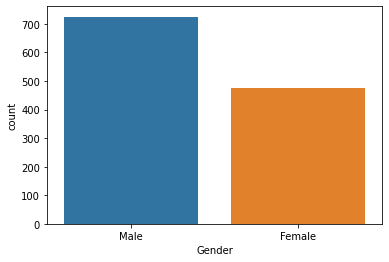

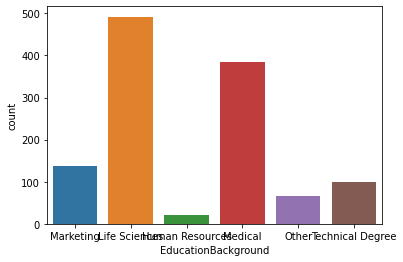

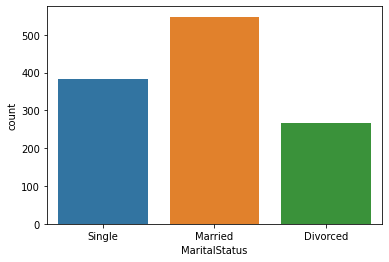

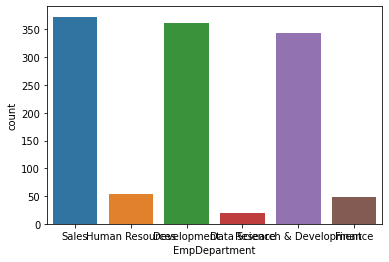

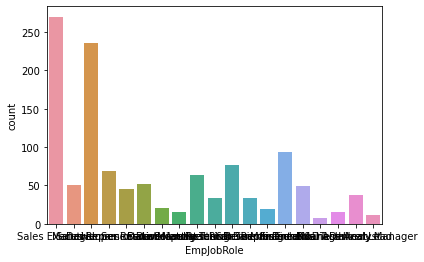

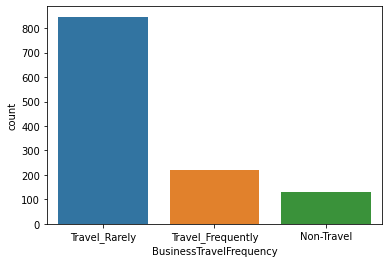

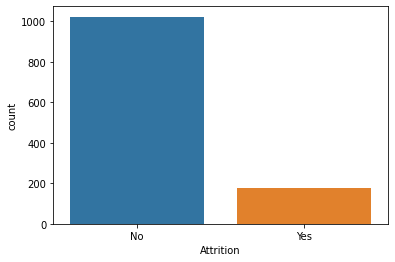

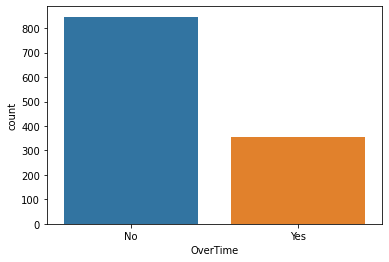

In [84]:
for i, col in enumerate(df2.columns):
    plt.figure(figsize=(8,9))
    sns.countplot(x=df2[col])

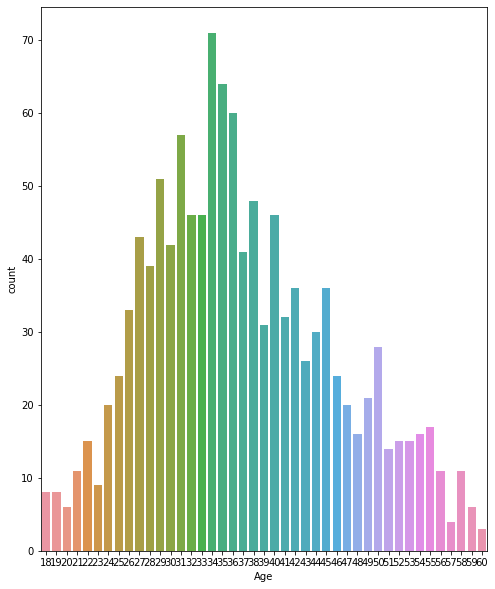

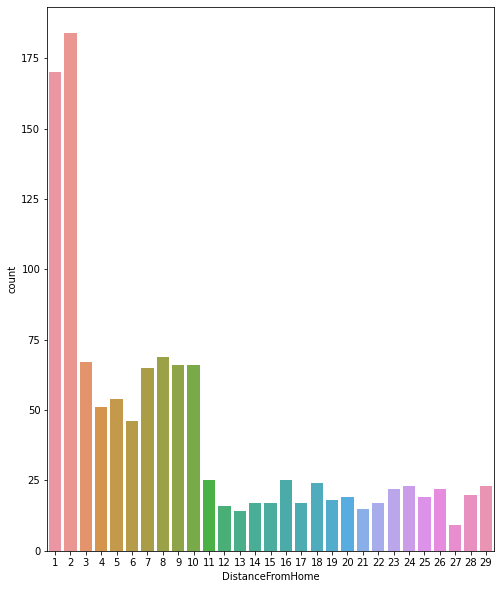

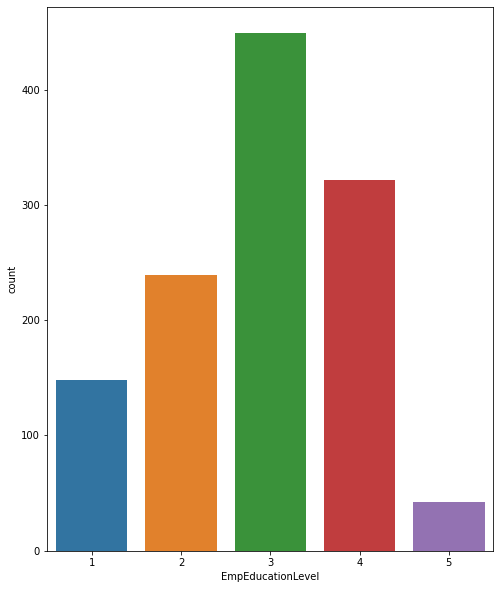

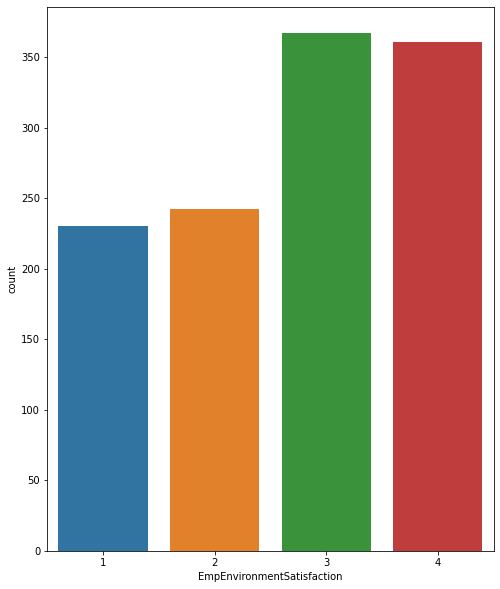

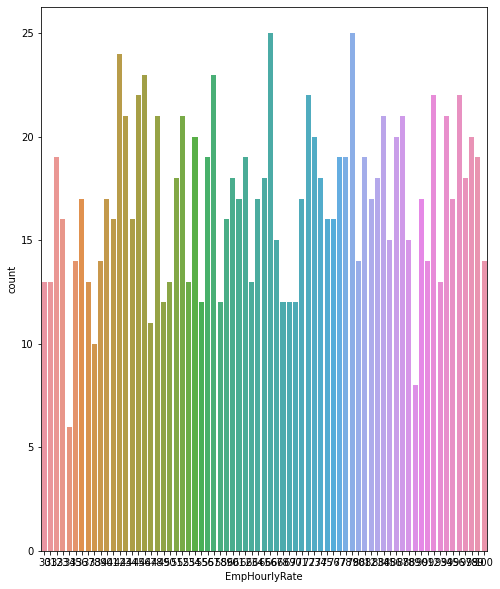

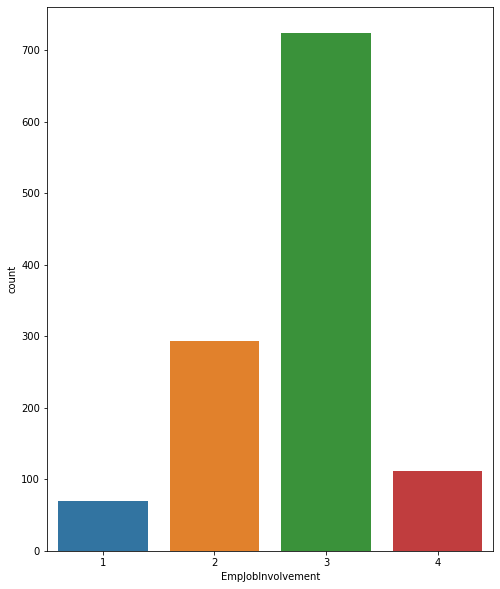

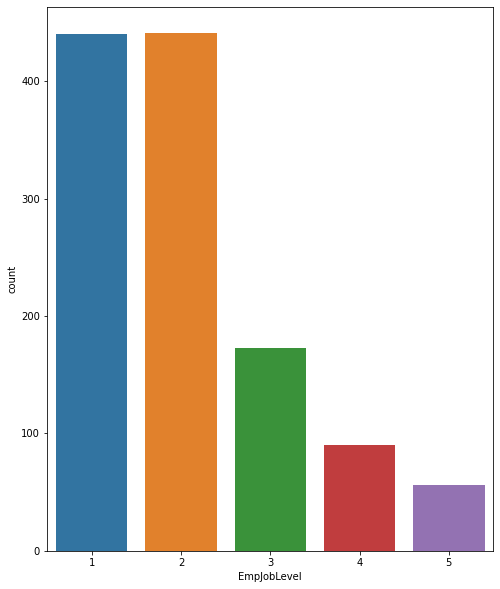

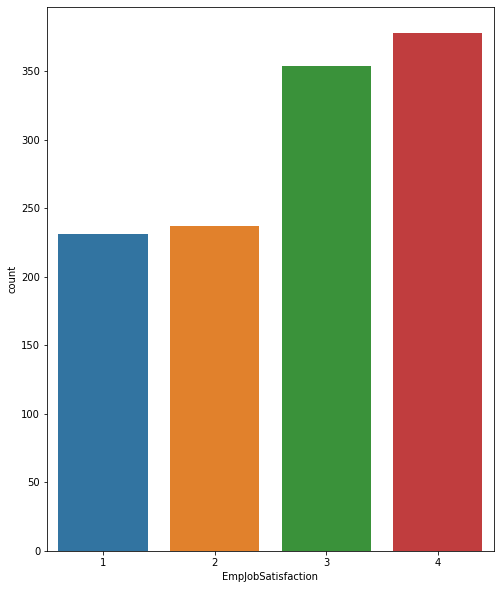

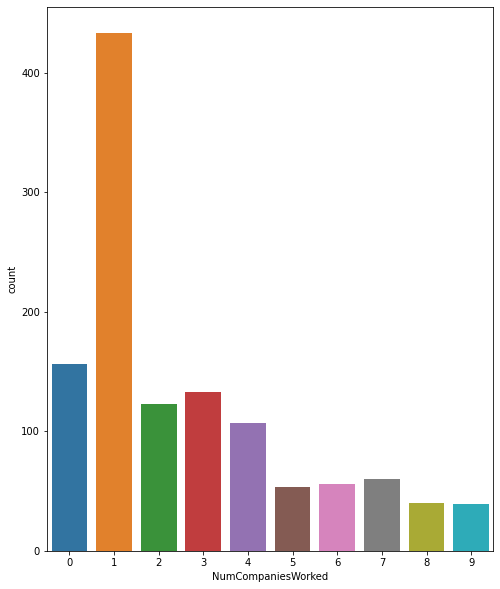

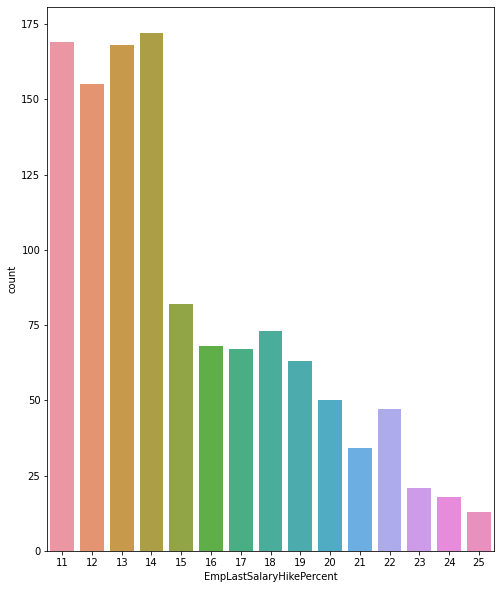

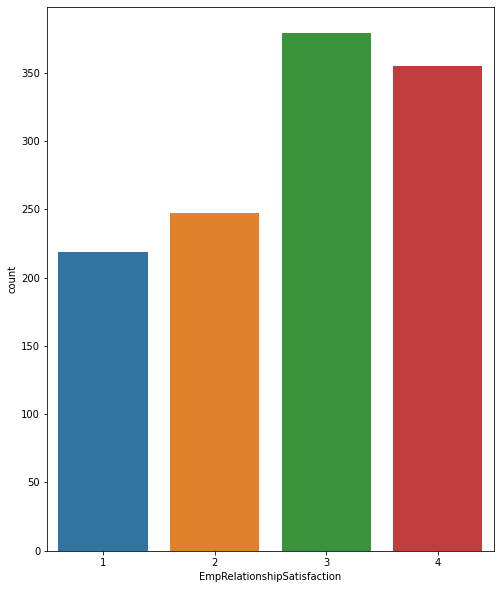

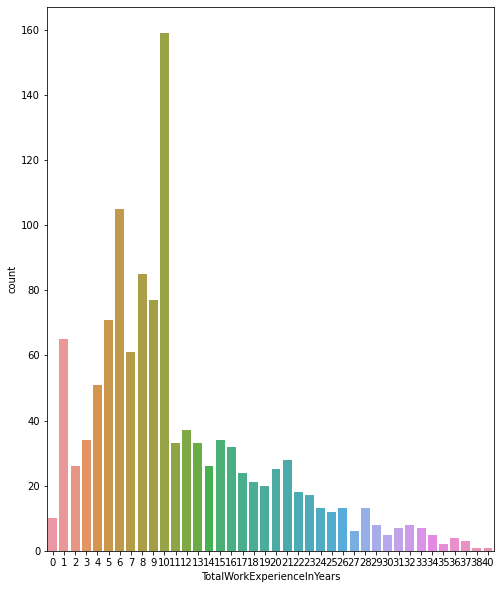

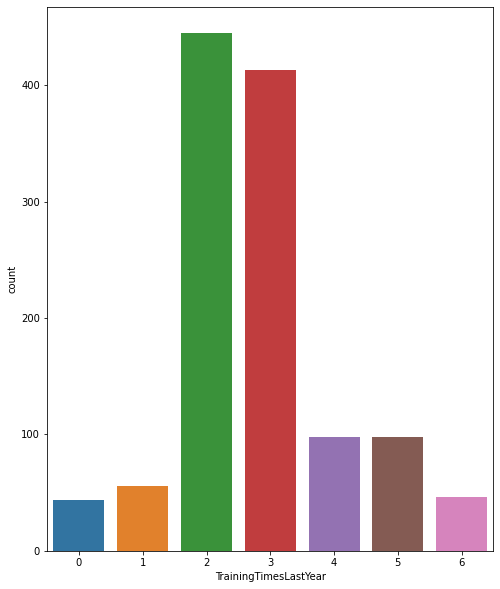

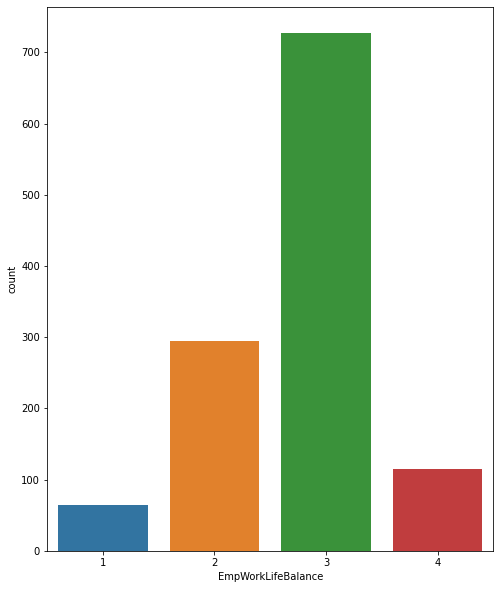

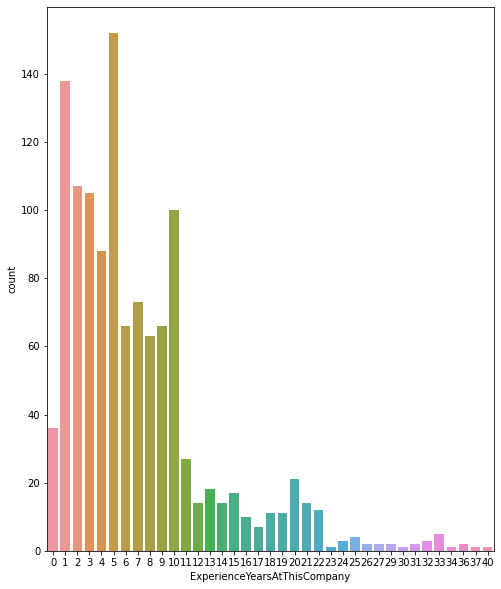

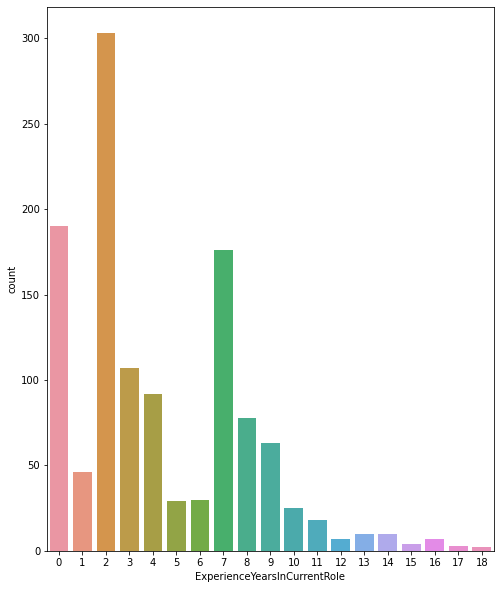

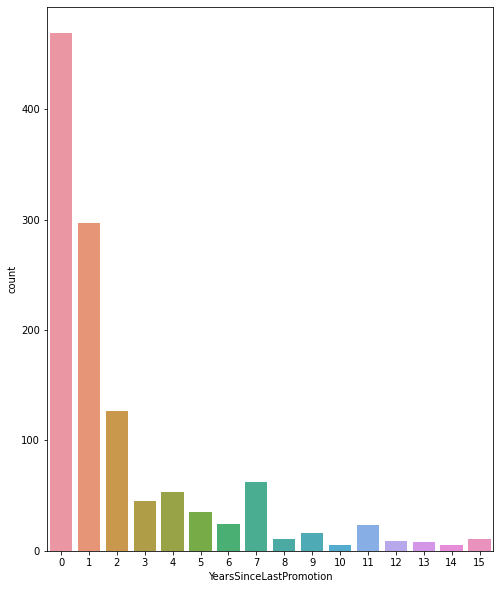

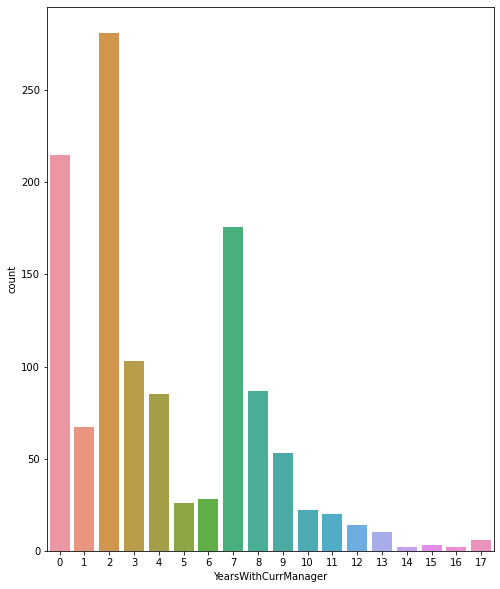

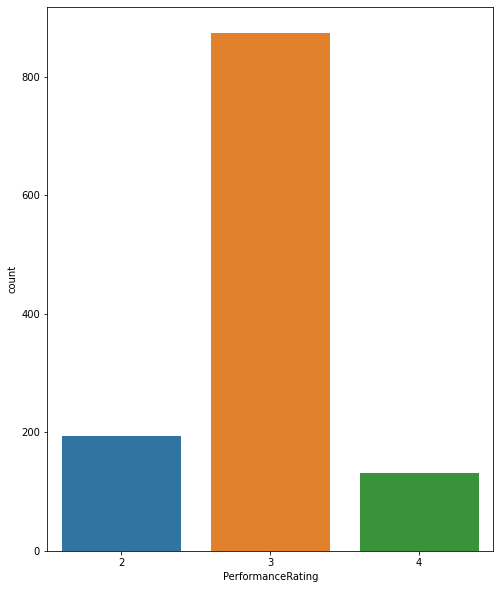

In [85]:
for i, col in enumerate(df3.columns):
    plt.figure(i,figsize=(8,10))
    sns.countplot(x=df3[col],data=df3)

**Observations from the Countplot:**
    

From the countplots of all the features and the label, we observed that the count of employees with performance rating '3' are more than that of the employees with Rating '1' and '4'.It is inferred from the countplots that :-

1. Most of the employees are working experience of  2 years with their current manager.
2. Most of the employees have 6 years of experience at the current company / this company.
3. The count of employees with 10 years of total experience is the most in the given dataset and the least is 40 years of total experience.From the Countplot it is also inferred that most of the employees fall under the total experience of 0-13 years.
4.The count of empoyees doing Overtime is less than the employees count who don't work for overtime.

#**Data Visualization using ScatterPlots and Other Plots:** 

In [91]:
df4=df.drop('EmpNumber',axis=1)

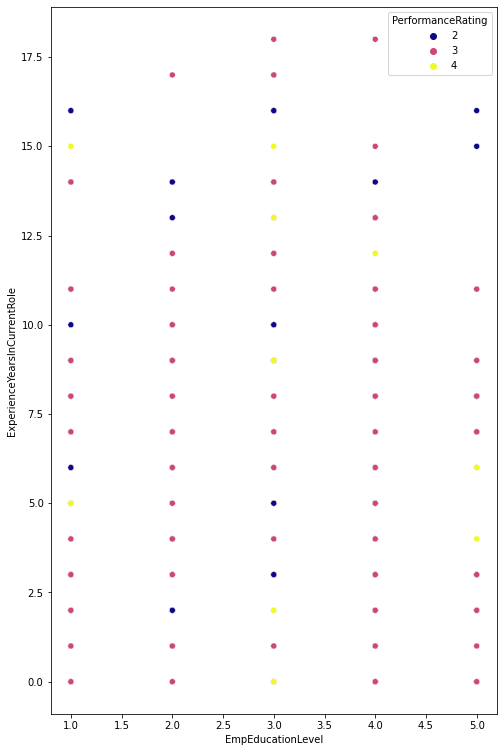

In [134]:
plt.figure(figsize=(8,13))
sns.scatterplot(x='EmpEducationLevel',y='ExperienceYearsInCurrentRole',data=df4,hue='PerformanceRating',palette='plasma')

#**Observations:**
       From the above plot, it is inferred that the performance rating increases as the value of EmpeducationLevel increases.Hence we see more data points with Performance Rating 3 and 4 for EmpEducationLevel 5 i.e 'Doctor'.
#**Improvements or Suggestions:**
      So the company should concentrate on the employees whose education level is 1,2 and 3 and necessary measures need to be taken to improve their performance.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warnin

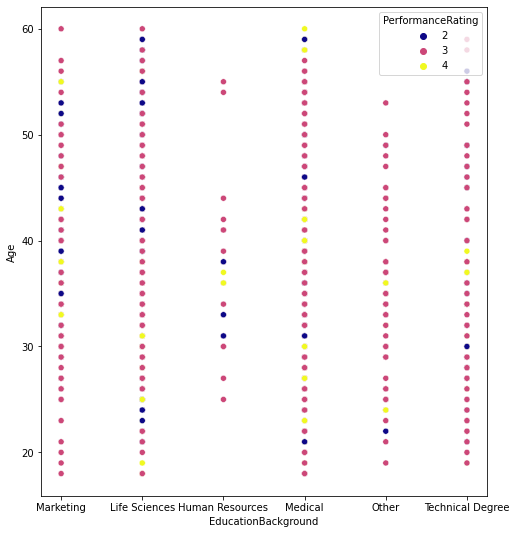

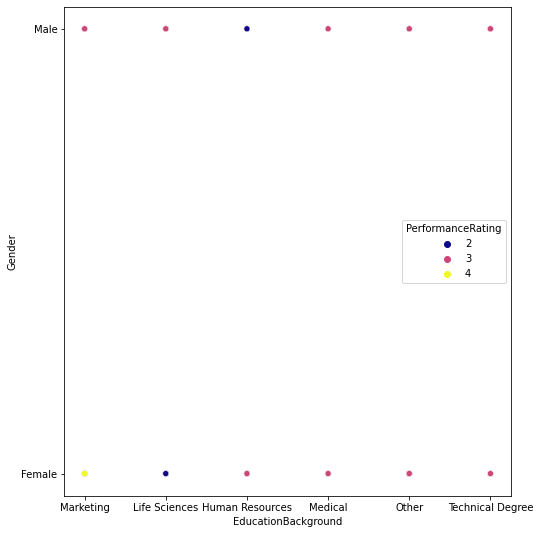

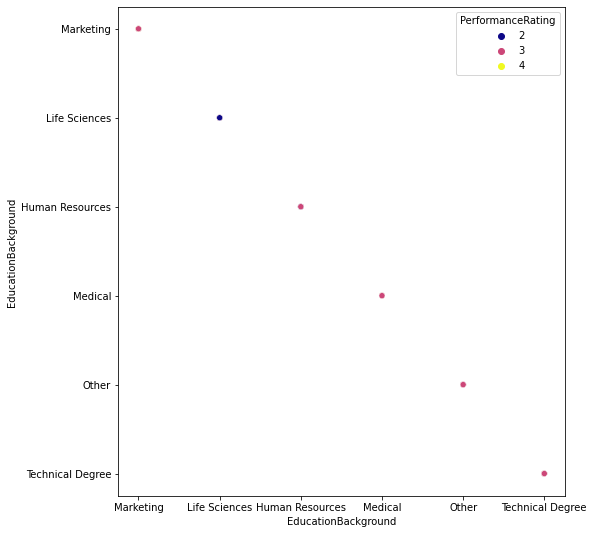

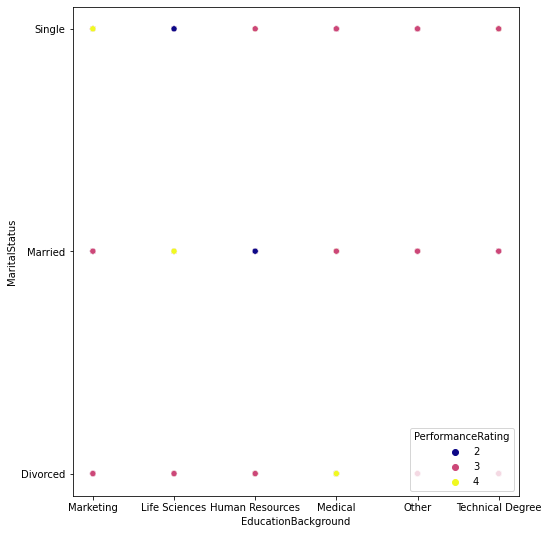

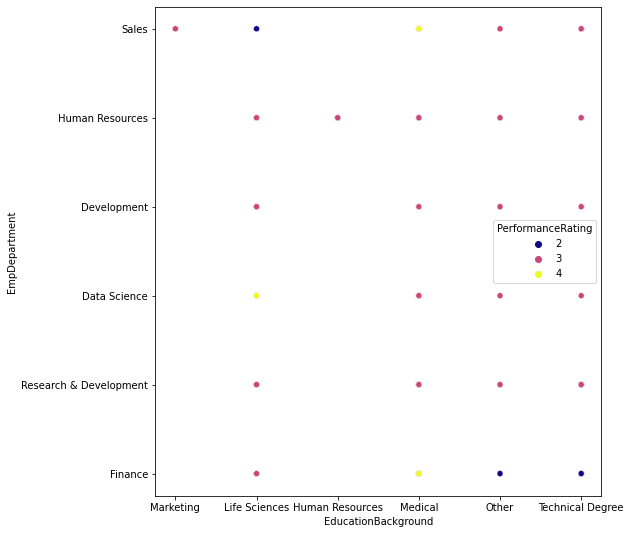

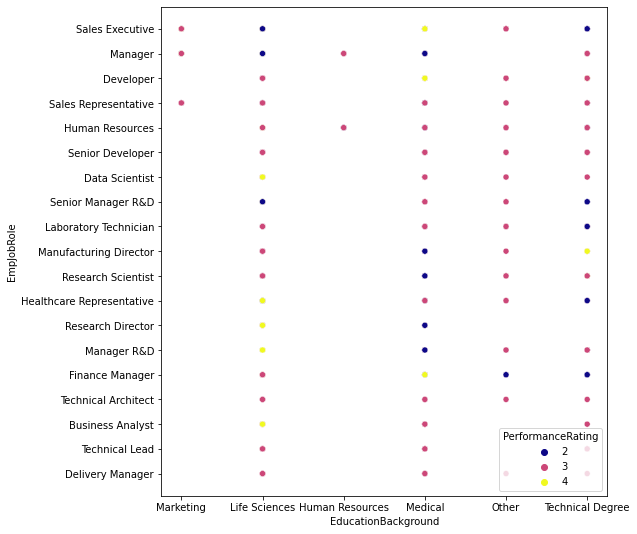

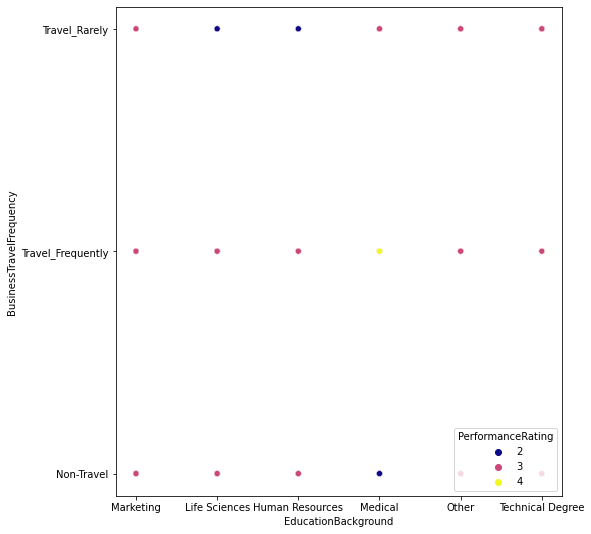

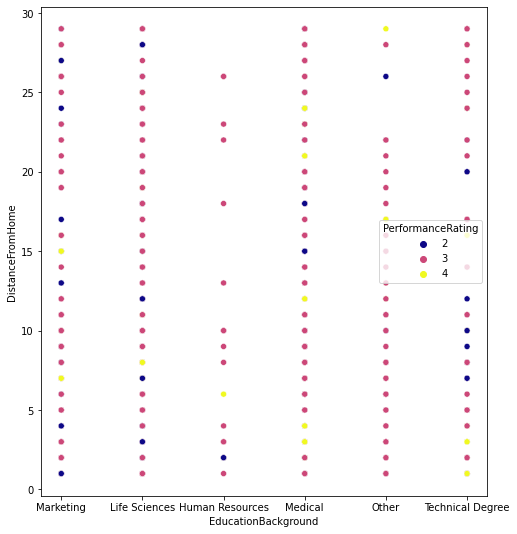

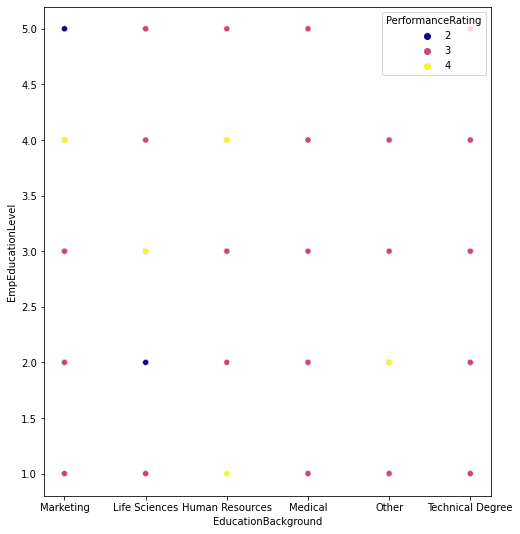

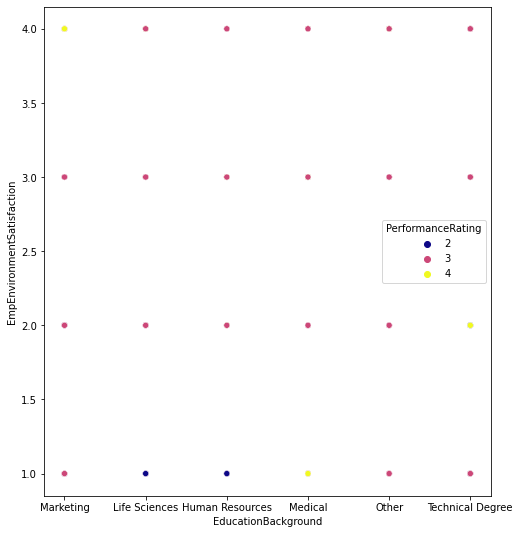

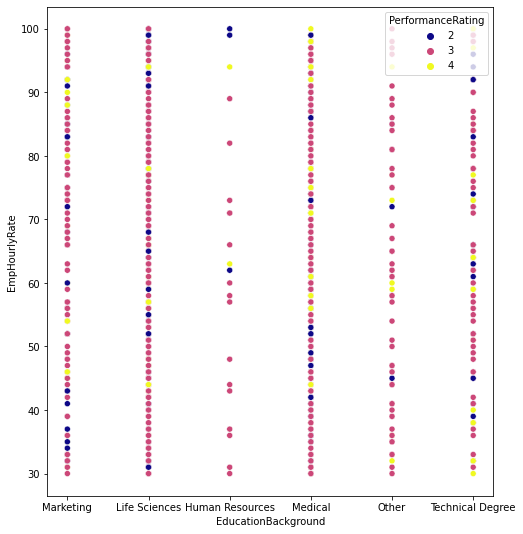

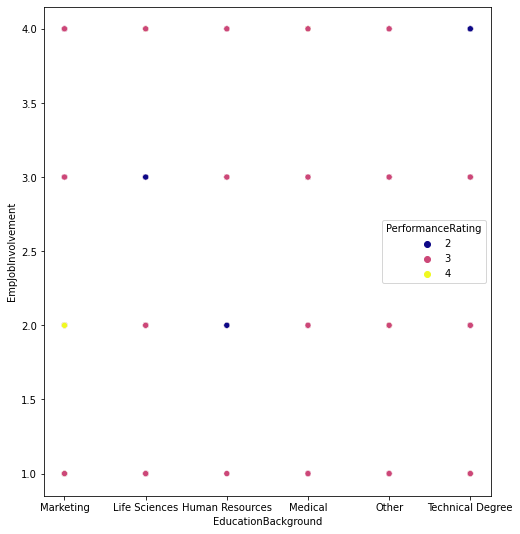

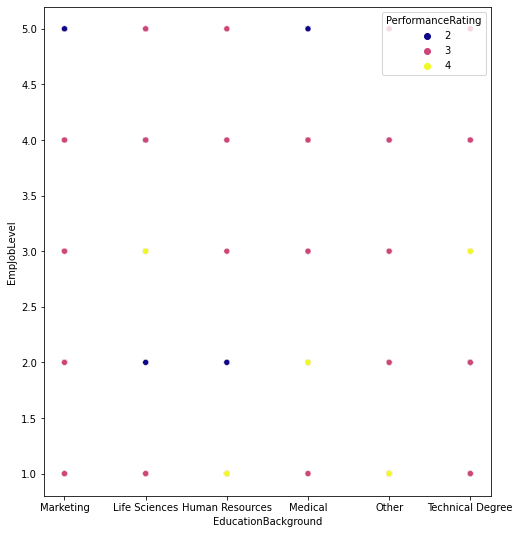

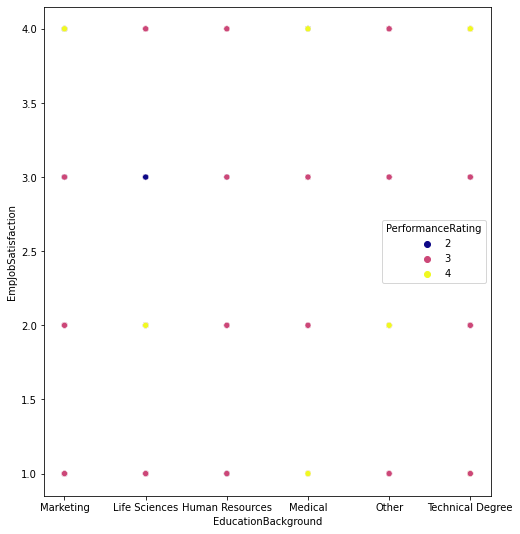

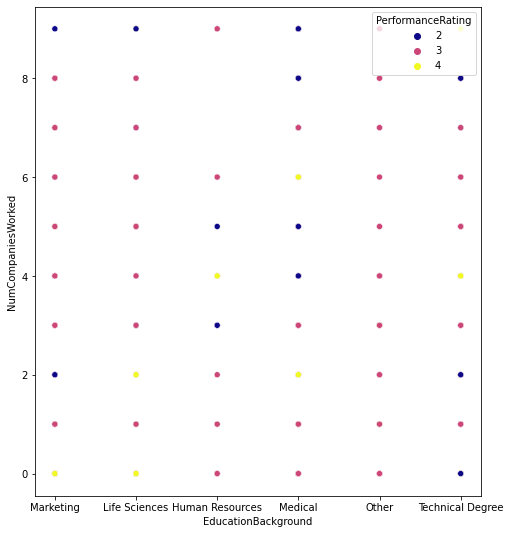

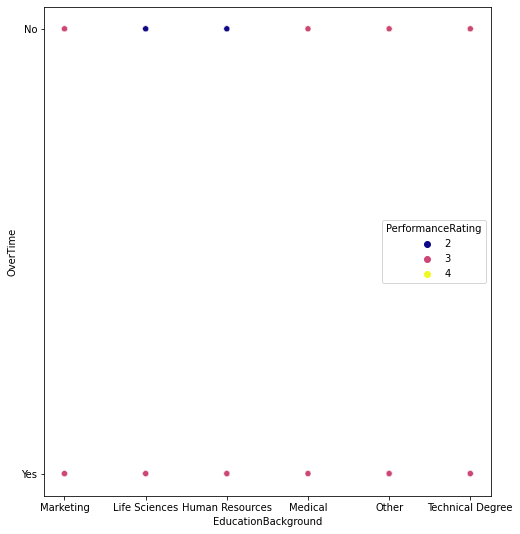

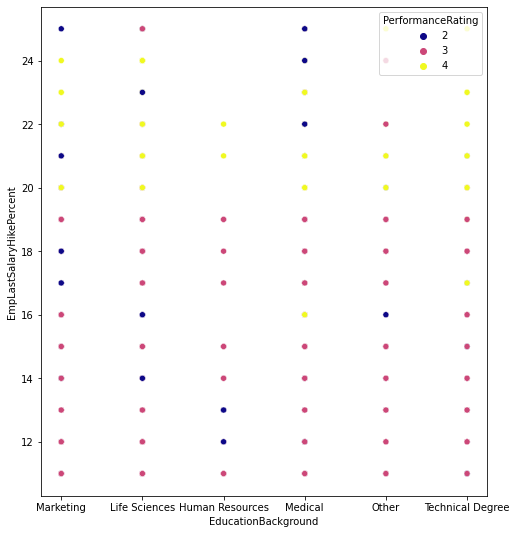

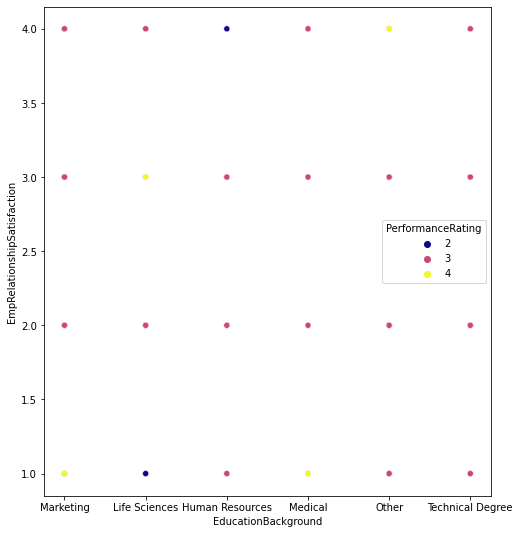

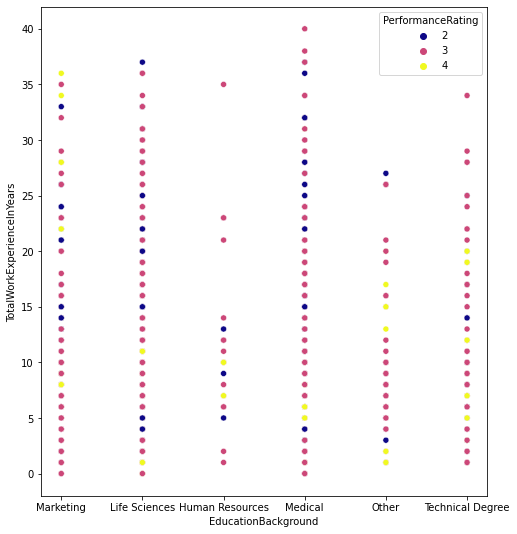

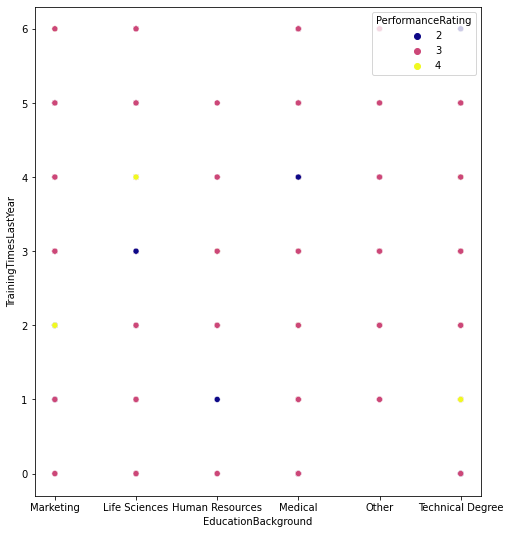

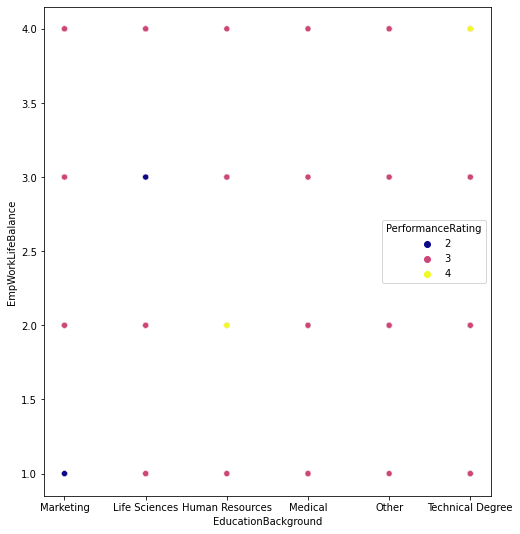

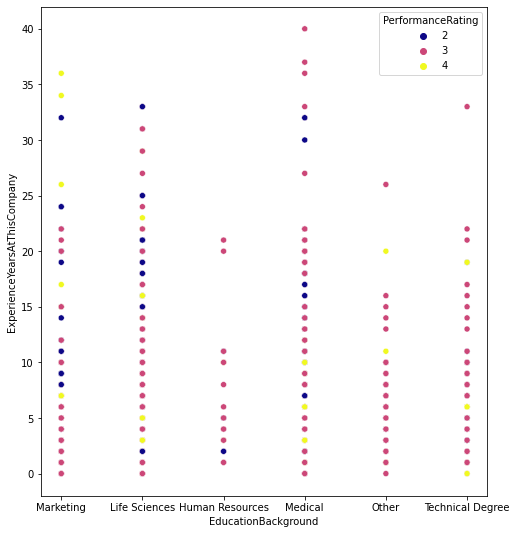

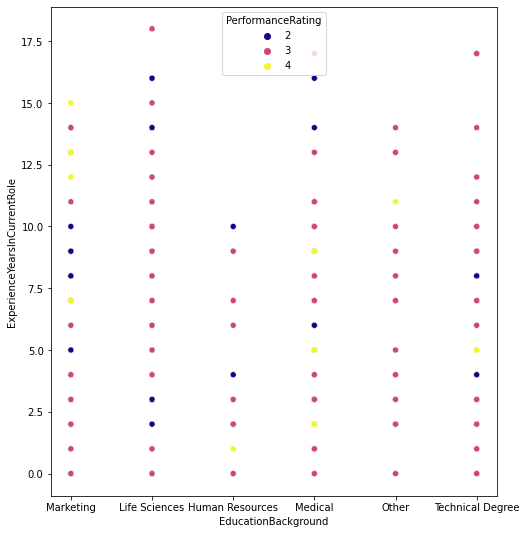

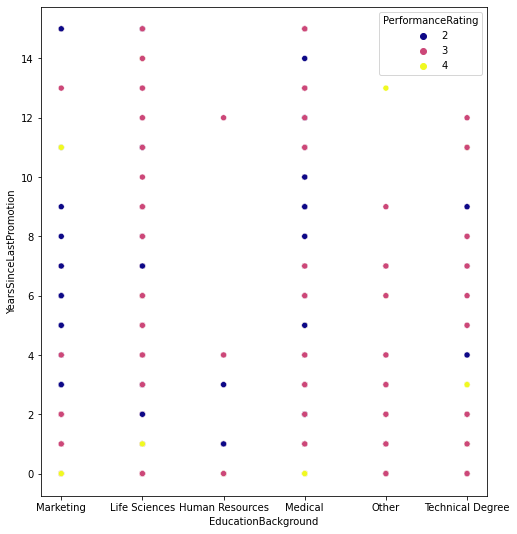

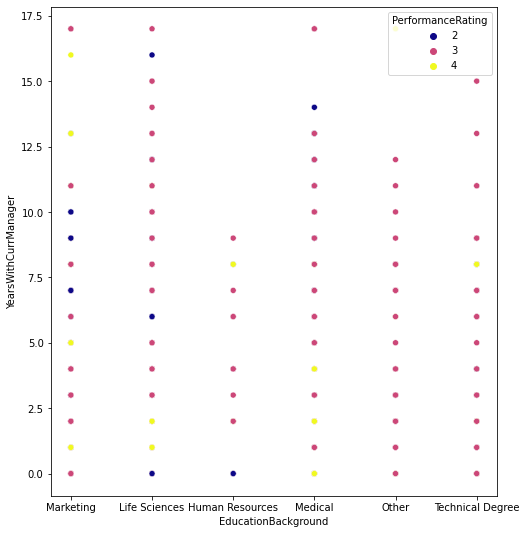

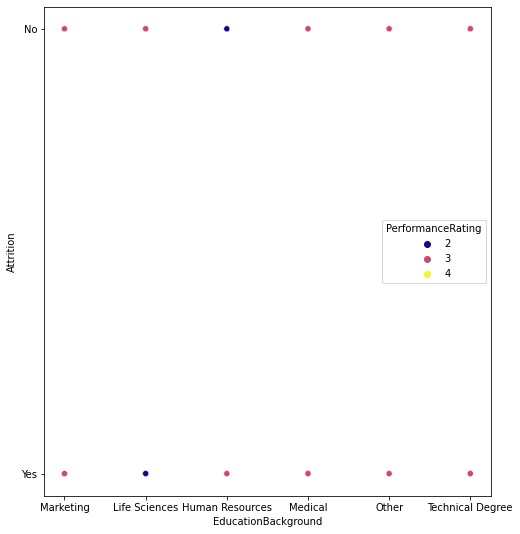

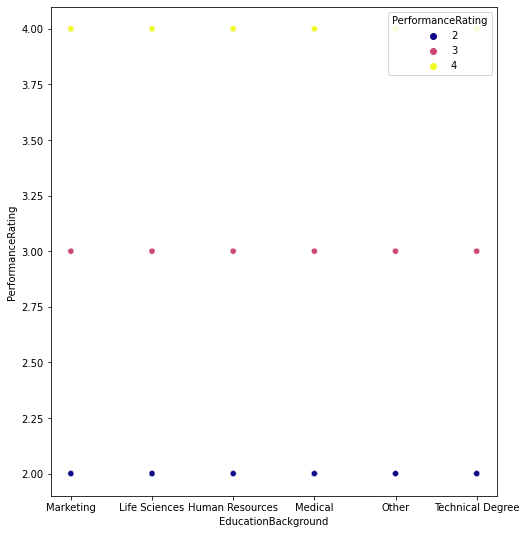

In [136]:
for i, col in enumerate(df4.columns):
    plt.figure(i,figsize=(8,9))
    sns.scatterplot(x='EducationBackground',y=df4[col],hue='PerformanceRating',data=df4,palette='plasma')

#**Results and Observations:**
        1.  From the scatterplot of x=EducationbackGround y=EmpDepartment, we infer that the employees from Finance and Sales Department have less PerformanceRating compared to other departments.So One should concentrate in these departments and improve their performance.
        2.  From the scatterplot of x=EducationbackGround y=EmpJobRole,it is observed that the employees with Job role such as 'Data Scientist','Finance Manager' and 'Sales Executive' have less performance rating comapared to other Job roles.So the Management needs to concentrate on the employees with these Jobroles and take effective measures to improve the employee performance.
        3.  From the scatterplot of x=EducationbackGround,y=BusinessTravelFrequency, we observe that the employees who travel rarely were rated with less 'PerformanceRating'.So the Firm/company needs to check and improve the performance of these employees.
        4.  From the scatterplot of x=EducationbackGround,y=EmpEnvironmentSatisfaction,it is inferred that the Employees with 'Very High' EmpEnvironmentSatisfaction are rated high compared to that of the employees with 'Low' and 'VeryLow' EmpEnvironmentSatisfaction .So EmpEnvironmentSatisfaction is plays a key role in Employee Performance and its rating and contributes a lot for our study.So EmpEnvironmentSatisfaction is positively correlated to PerformanceRating.
        5. From the scatterplot of x=EducationbackGround,y=EmpJobInvolvement,it is inferred that the Employees with 'Very Low' EmpJobInvolvement are rated high compared to that of the employees with 'High' and 'Very High' EmpJobInvolvement .So EmpJobInvolvement is negatively correlated to PerformanceRating.
        6. From the scatterplot of x=EducationbackGround,y=EmpJobLevel,it is inferred that the Employees with 'Very Low' EmpJobLevel are rated high compared to that of the employees with 'High' and 'Very High' EmpJobLevel .So EmpJobLevel is negatively correlated to PerformanceRating.
        7. From the scatterplot of x=EducationbackGround,y=OverTime,it is inferred that the Employees who did Overtime were rated High compared to the one who hadn't worked for Overtime but to a small extent.
        8.From the scatterplot of x=EducationbackGround,y=EmpLastSalaryHikePercent we could infer that the employees with high hike percent were rated high and  EmpLastSalaryHikePercent is positively correlated to Performance Rating.So Performance Rating is highly dependent on EmpLastSalaryHikePercent.

In [141]:
df6=df[['EmpJobInvolvement','EmpJobSatisfaction','PerformanceRating','Attrition','EmpLastSalaryHikePercent','EmpEnvironmentSatisfaction']]

In [ ]:
for i, col in enumerate(df6.columns):
    plt.figure(i,figsize=(8,9))
    sns.scatterplot(x='EmpJobInvolvement',y=df6[col],hue='PerformanceRating',data=df6,palette='plasma')

In [ ]:
for i, col in enumerate(df6.columns):
    plt.figure(i,figsize=(8,9))
    sns.scatterplot(x='EmpJobSatisfaction',y=df6[col],hue='PerformanceRating',data=df6,palette='plasma')

In [ ]:
for i, col in enumerate(df6.columns):
    plt.figure(i,figsize=(8,9))
    sns.scatterplot(x='EmpLastSalaryHikePercent',y=df6[col],hue='PerformanceRating',data=df6,palette='plasma')

In [ ]:
for i, col in enumerate(df6.columns):
    plt.figure(i,figsize=(8,9))
    sns.scatterplot(x='EmpEnvironmentSatisfaction',y=df6[col],hue='PerformanceRating',data=df6,palette='plasma')

#**Data Visualization Using Barplots and KDE Plot and Pairplot:**

In [ ]:
for i, col in enumerate(df4.columns):
    plt.figure(i,figsize=(12,18))
    sns.barplot(x='EmpJobInvolvement',y=df4[col],hue='PerformanceRating',data=df4,palette='plasma')

In [ ]:
for i, col in enumerate(df6.columns):
    plt.figure(i,figsize=(8,9))
    sns.barplot(x='EmpJobInvolvement',y=df6[col],hue='PerformanceRating',data=df6,palette='plasma')

In [ ]:
for i, col in enumerate(df3.columns):
    plt.figure(i,figsize=(8,10))
    sns.kdeplot(x=df3[col],data=df3)

In [ ]:
for i, col in enumerate(df6.columns):
    plt.figure(i,figsize=(8,10))
    sns.pairplot(df6)

#**Checking correlation of the data:-**

In [145]:
corr = df.corr()
corr['PerformanceRating'].sort_values(ascending = False)

PerformanceRating               1.000000
EmpEnvironmentSatisfaction      0.395561
EmpLastSalaryHikePercent        0.333722
EmpWorkLifeBalance              0.124429
NumCompaniesWorked              0.020980
EmpEducationLevel               0.020529
EmpJobSatisfaction              0.000606
TrainingTimesLastYear          -0.005443
EmpJobInvolvement              -0.010539
EmpRelationshipSatisfaction    -0.019502
Age                            -0.040164
EmpHourlyRate                  -0.043116
DistanceFromHome               -0.046142
TotalWorkExperienceInYears     -0.068141
EmpJobLevel                    -0.076632
ExperienceYearsAtThisCompany   -0.111645
YearsWithCurrManager           -0.122313
ExperienceYearsInCurrentRole   -0.147638
YearsSinceLastPromotion        -0.167629
Name: PerformanceRating, dtype: float64

#**Correlation Results and Observations:**
From the Correlation Matrix, it is observed that the Performance Rating is highly dependent on the  features 'EmpEnvironmentSatisfaction','EmpLastSalaryHikePercent','EmpWorkLifeBalance','EmpJobInvolvement' and contribute a lot for the Employee Performance.

#**Label Encoding of the Given Data:**

In [147]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for x in df:
    if df[x].dtypes=='object':
        df[x] = le.fit_transform(df[x])

In [148]:
df.head()


,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,0,32,1,2,2,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,3
1,1,47,1,2,2,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,3
2,2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,4
3,3,41,1,0,0,3,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,3
4,4,60,1,2,2,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,3


#**Heat Map:**

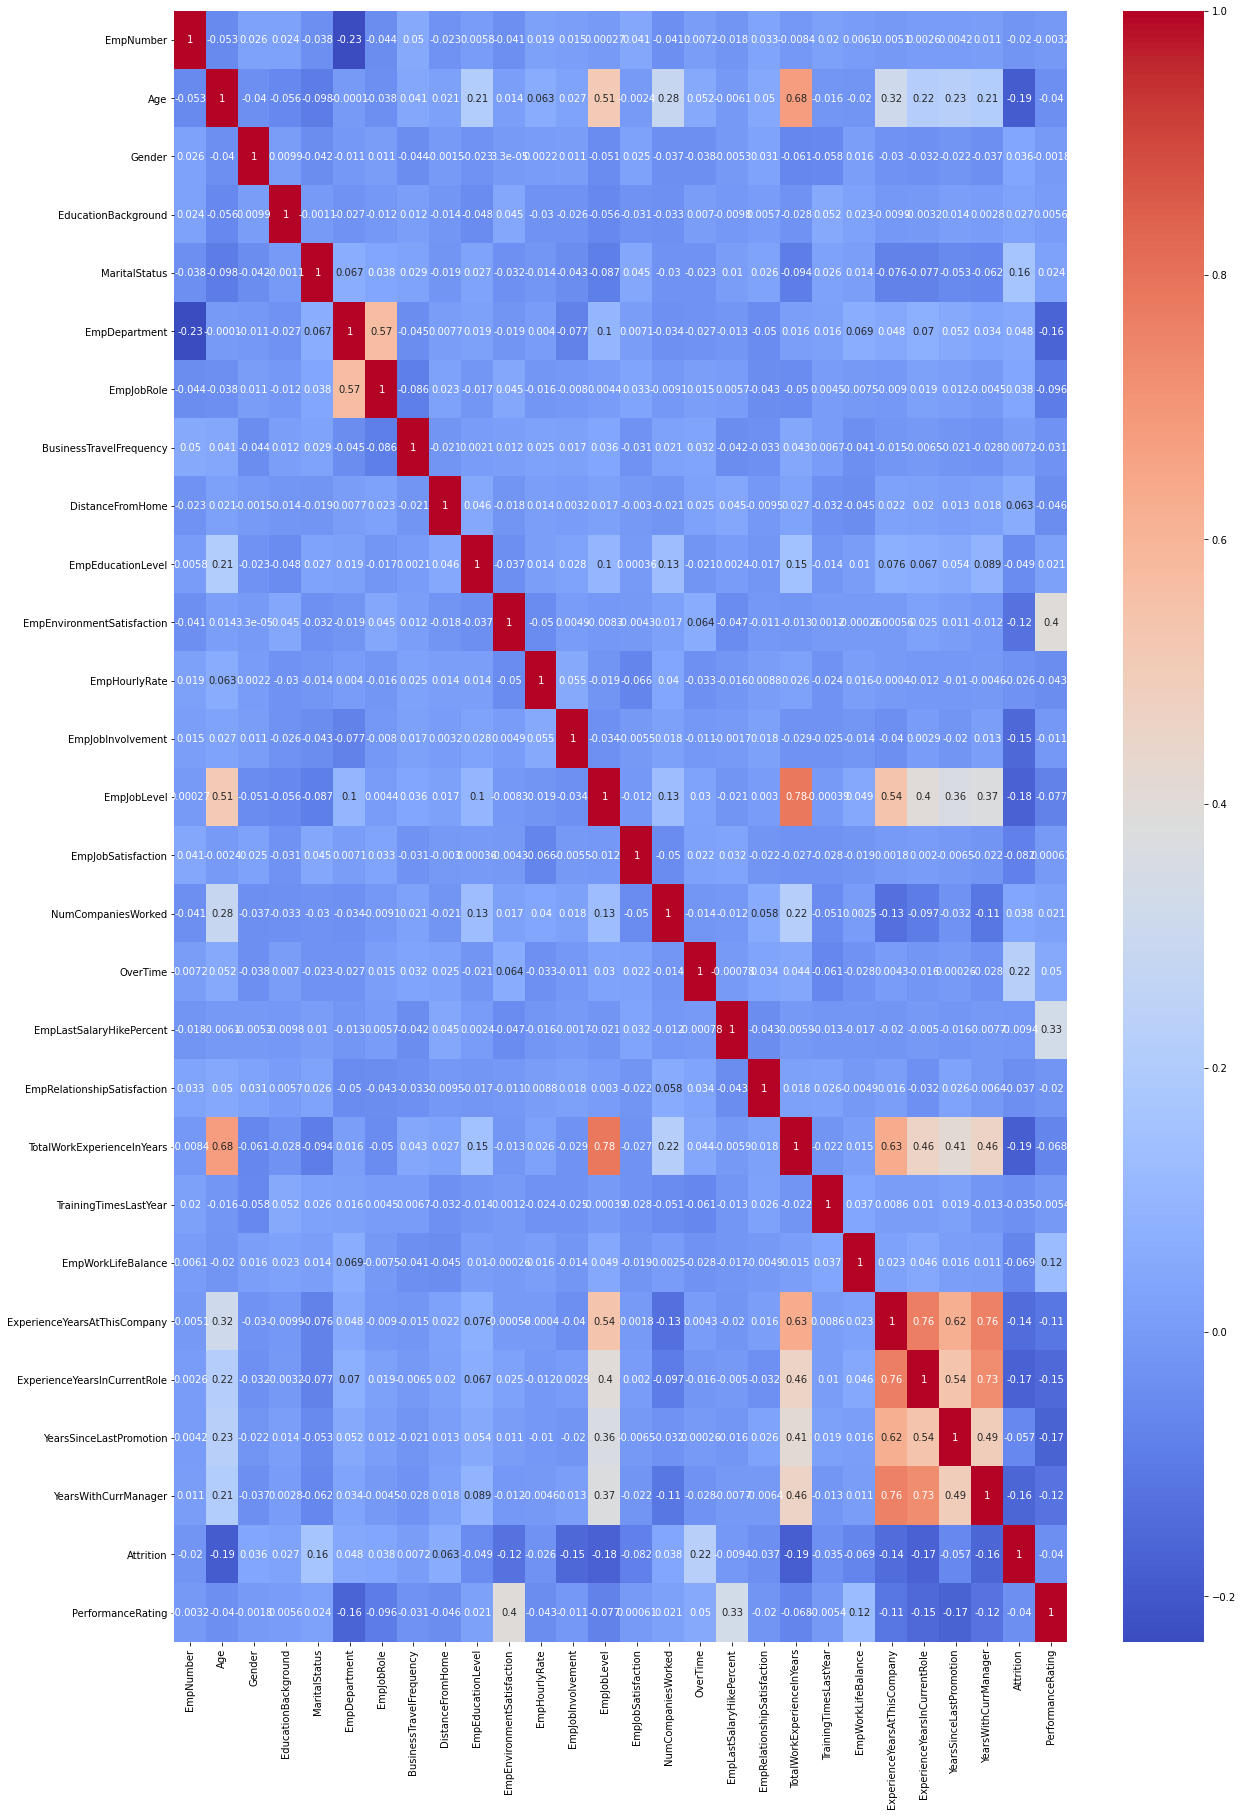

In [150]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,30))
sns.heatmap(corr, annot=True, ax=ax, cmap = 'coolwarm')

#**Train_Test_Splitting of the Given Data:**

In [153]:
x = df.drop(columns=['PerformanceRating','EmpNumber','Age','Gender','MaritalStatus'])
y = df['PerformanceRating']

In [154]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 13)

In [155]:
x_train.shape

(840, 23)

In [156]:
x_test.shape

(360, 23)

#**Applying Machine Learning Algorithms / Data Modelling:**

**Importing The Necessary Packages for Data Modelling:**

In [223]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import precision_score,recall_score
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#**Scaling the Given Data Using StandardScaler:**

In [160]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)

#**Logistic Regression:**

In [227]:
Log_model = LogisticRegression()
Log_model.fit(x_train,y_train)
y_predict = Log_model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8194444444444444

In [ ]:
y_test

In [ ]:
y_predict

In [228]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,29,29,1
3,17,238,4
4,2,12,28


In [230]:
confusion_matrix(y_test,y_predict)

array([[ 29,  29,   1],
       [ 17, 238,   4],
       [  2,  12,  28]])

In [229]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.60      0.49      0.54        59
           3       0.85      0.92      0.88       259
           4       0.85      0.67      0.75        42

    accuracy                           0.82       360
   macro avg       0.77      0.69      0.72       360
weighted avg       0.81      0.82      0.81       360



#**DecisionTreeClassifier:**

In [231]:
Dec_Tree_model = DecisionTreeClassifier()
Dec_Tree_model.fit(x_train,y_train)
y_predict = Dec_Tree_model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8805555555555555

In [ ]:
y_test

In [ ]:
y_predict

In [232]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,51,8,0
3,15,233,11
4,2,7,33


In [233]:
confusion_matrix(y_test,y_predict)

array([[ 51,   8,   0],
       [ 15, 233,  11],
       [  2,   7,  33]])

In [234]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.75      0.86      0.80        59
           3       0.94      0.90      0.92       259
           4       0.75      0.79      0.77        42

    accuracy                           0.88       360
   macro avg       0.81      0.85      0.83       360
weighted avg       0.89      0.88      0.88       360



#**RandomForestClassifier:**

In [235]:
Rand_For_model = RandomForestClassifier(random_state=13,n_estimators=100)
Rand_For_model.fit(x_train,y_train)
y_predict = Rand_For_model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9277777777777778

In [ ]:
y_test

In [ ]:
y_predict

In [236]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,51,8,0
3,7,252,0
4,1,10,31


In [237]:
confusion_matrix(y_test,y_predict)

array([[ 51,   8,   0],
       [  7, 252,   0],
       [  1,  10,  31]])

In [238]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.86      0.86      0.86        59
           3       0.93      0.97      0.95       259
           4       1.00      0.74      0.85        42

    accuracy                           0.93       360
   macro avg       0.93      0.86      0.89       360
weighted avg       0.93      0.93      0.93       360



#**MLPClassifier:**

In [239]:
MLP_model = MLPClassifier(hidden_layer_sizes=(100),random_state=13)
MLP_model.fit(x_train,y_train)
y_predict = MLP_model.predict(x_test)
accuracy_score(y_test,y_predict)

0.8333333333333334

In [ ]:
y_test

In [ ]:
y_predict

In [240]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,37,22,0
3,15,238,6
4,1,16,25


In [241]:
confusion_matrix(y_test,y_predict)

array([[ 37,  22,   0],
       [ 15, 238,   6],
       [  1,  16,  25]])

In [242]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.70      0.63      0.66        59
           3       0.86      0.92      0.89       259
           4       0.81      0.60      0.68        42

    accuracy                           0.83       360
   macro avg       0.79      0.71      0.75       360
weighted avg       0.83      0.83      0.83       360



#**KNeighborsClassifier:**

In [243]:
KNN_model = KNeighborsClassifier()
KNN_model.fit(x_train,y_train)
y_predict = KNN_model.predict(x_test)
accuracy_score(y_test,y_predict)

0.75

In [ ]:
y_test

In [ ]:
y_predict

In [245]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,17,42,0
3,12,246,1
4,4,31,7


In [244]:
confusion_matrix(y_test,y_predict)

array([[ 17,  42,   0],
       [ 12, 246,   1],
       [  4,  31,   7]])

In [246]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           2       0.52      0.29      0.37        59
           3       0.77      0.95      0.85       259
           4       0.88      0.17      0.28        42

    accuracy                           0.75       360
   macro avg       0.72      0.47      0.50       360
weighted avg       0.74      0.75      0.71       360



#**XGBClassifier:**

In [247]:
XGB_Classfr_model =XGBClassifier(learning_rate = 0.1,random_state=13,n_estimators=100)
XGB_Classfr_model.fit(x_train,y_train)
y_predict = XGB_Classfr_model.predict(x_test)
accuracy_score(y_test,y_predict)

0.9361111111111111

In [ ]:
y_test

In [ ]:
y_predict

In [248]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,52,7,0
3,7,251,1
4,1,7,34


In [ ]:
confusion_matrix(y_test,y_predict)

In [ ]:
print(classification_report(y_test,y_predict))

#**Support vector machine/SVM Machine Learning:**

In [249]:
SVM_model = SVC(gamma=0.01,kernel='rbf')
SVM_model.fit(x_train,y_train)
y_predict = SVM_model.predict(x_test)
accuracy_score(y_test,y_predict)

0.7611111111111111

In [ ]:
y_test

In [ ]:
y_predict

In [250]:
pd.crosstab(y_test,y_predict)

col_0,2,3,4
PerformanceRating,,,
2,10,49,0
3,0,259,0
4,0,37,5


In [251]:
confusion_matrix(y_test,y_predict)

array([[ 10,  49,   0],
       [  0, 259,   0],
       [  0,  37,   5]])

In [ ]:
print(classification_report(y_test,y_predict))

In [224]:
#Dataframe for models
models = {"Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier(),
          "DecisionTree": DecisionTreeClassifier(),
          "KNN": KNeighborsClassifier(),
          "MPL":MLPClassifier(),
          "XGB": XGBClassifier(),
          "SVM": SVC()}
          
          

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models : a dict of differetn Scikit-Learn machine learning models
    X_train : training data (no labels)
    X_test : testing data (no labels)
    y_train : training labels
    y_test : test labels
    """
    # Set random seed
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

In [225]:
model_scores = fit_and_score(models=models,
                             x_train=x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)

model_scores

{'DecisionTree': 0.8861111111111111,
 'KNN': 0.75,
 'Logistic Regression': 0.8194444444444444,
 'MPL': 0.8194444444444444,
 'Random Forest': 0.925,
 'SVM': 0.825,
 'XGB': 0.9361111111111111}

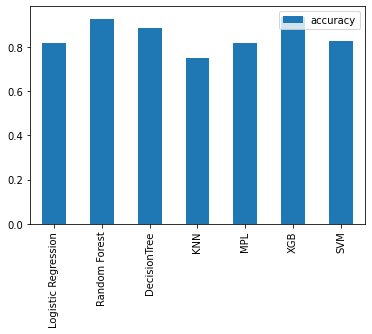

In [226]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();

#**Modelling Analysis and Conclusions:**

 We have used all the Classification Algorithms like LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(), KNeighborsClassifier(),MLPClassifier(),XGBClassifier(),SVM Techniques and compared their performances based on the Accuracy Score.By Analyzing the Crosstab function, Confusion matrix and Accuracy scores, we infer that XGBoost and RandomForest Classifier have been executed with 0.93 and 0.92 Accuracy Scores respectively.So We conclude to use XGBoost Classifier or Random Forest Classifier for the above study to predict the Employee Performance.

#**The following insights are expected from this project.**
1. Department wise performances
2. Top 3 Important Factors effecting employee performance
3. A trained model which can predict the employee performance based on factors as inputs. This
will be used to hire employees
4. Recommendations to improve the employee performance based on insights from analysis.

#**Answer to 1st Question:**

#**Evaluating Departmentwise Performance Rating**

In [14]:
print(df.groupby('EmpDepartment').mean()['PerformanceRating'])

EmpDepartment
Data Science              3.050000
Development               3.085873
Finance                   2.775510
Human Resources           2.925926
Research & Development    2.921283
Sales                     2.860590
Name: PerformanceRating, dtype: float64


In [20]:
print(df.groupby('EmpDepartment').describe()['PerformanceRating'])

                        count      mean       std  min  25%  50%  75%  max
EmpDepartment                                                             
Data Science             20.0  3.050000  0.394034  2.0  3.0  3.0  3.0  4.0
Development             361.0  3.085873  0.388508  2.0  3.0  3.0  3.0  4.0
Finance                  49.0  2.775510  0.586846  2.0  2.0  3.0  3.0  4.0
Human Resources          54.0  2.925926  0.544331  2.0  3.0  3.0  3.0  4.0
Research & Development  343.0  2.921283  0.559016  2.0  3.0  3.0  3.0  4.0
Sales                   373.0  2.860590  0.555400  2.0  3.0  3.0  3.0  4.0


From the above results,it's inferred that :
 1. The mean performance rating in Data Science Department  is 3.05.
 2. The mean performance rating in Development Department is 3.085873.
 3. The mean performance rating in Finance Department  is 2.775510.
 4. The mean performance rating in Human Resources Department is 2.925926.
 5. The mean performancerating in Research & Development Department is 2.921283.
 6. The mean performance rating in Sales Department is 2.860590.


#**Answer to 2nd Question:**

**Top 3 Important Factors effecting employee performance:**

Top 3 Important Factors effecting employee performance are 'EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction' and 'EmpJobInvolvement' and these are slected as top 3 based on the correlation results and Scatterplot and Countplot results and analysis.It's because these features are highly correlated to PerformanceRating and the performance rating value has high dependency on these features.

#**Answer to 3rd Question:**

**A trained model which can predict the employee performance based on factors as inputs. This will be used to hire employees**

We have used all the Classification Algorithms like LogisticRegression(),RandomForestClassifier(),DecisionTreeClassifier(), KNeighborsClassifier(),MLPClassifier(),XGBClassifier(),SVM Techniques and compared their performances based on the Accuracy Score.By Analyzing the Crosstab function, Confusion matrix and Accuracy scores, we infer that XGBoost and RandomForest Classifier have been executed with 0.93 and 0.92 Accuracy Scores respectively.So We conclude to use XGBoost Classifier or Random Forest Classifier for the above study to predict the Employee Performance.

#**Answer to 3rd Question:**

**Recommendations to improve the employee performance based on insights from analysis.**

From our study,it's clear thatTop 3 Important Factors effecting employee performance are 
'EmpLastSalaryHikePercent', 'EmpEnvironmentSatisfaction' and 'EmpJobInvolvement' .So we try to concentrate more on these factors.
1.  From the scatterplot of x=EducationbackGround y=EmpDepartment, we infer that the employees from Finance and Sales Department have less PerformanceRating compared to other departments.So One should concentrate in these departments and improve their performance.
2.  From the scatterplot of x=EducationbackGround y=EmpJobRole,it is observed that the employees with Job role such as 'Data Scientist','Finance Manager' and 'Sales Executive' have less performance rating comapared to other Job roles.So the Management needs to concentrate on the employees with these Jobroles and take effective measures to improve the employee performance.
3.  From the scatterplot of x=EducationbackGround,y=BusinessTravelFrequency, we observe that the employees who travel rarely were rated with less 'PerformanceRating'.So the Firm/company needs to check and improve the performance of these employees.
4.  From the scatterplot of x=EducationbackGround,y=EmpEnvironmentSatisfaction,it is inferred that the Employees with 'Very High' EmpEnvironmentSatisfaction are rated high compared to that of the employees with 'Low' and 'VeryLow' EmpEnvironmentSatisfaction .So EmpEnvironmentSatisfaction is plays a key role in Employee Performance and its rating and contributes a lot for our study.So EmpEnvironmentSatisfaction is positively correlated to PerformanceRating.
5. From the scatterplot of x=EducationbackGround,y=EmpJobInvolvement,it is inferred that the Employees with 'Very Low' EmpJobInvolvement are rated high compared to that of the employees with 'High' and 'Very High' EmpJobInvolvement .So EmpJobInvolvement is negatively correlated to PerformanceRating.
6. From the scatterplot of x=EducationbackGround,y=EmpJobLevel,it is inferred that the Employees with 'Very Low' EmpJobLevel are rated high compared to that of the employees with 'High' and 'Very High' EmpJobLevel .So EmpJobLevel is negatively correlated to PerformanceRating.
7. From the scatterplot of x=EducationbackGround,y=OverTime,it is inferred that the Employees who did Overtime were rated High compared to the one who hadn't worked for Overtime but to a small extent.
8.From the scatterplot of x=EducationbackGround,y=EmpLastSalaryHikePercent we could infer that the employees with high hike percent were rated high and  EmpLastSalaryHikePercent is positively correlated to Performance Rating.So Performance Rating is highly dependent on EmpLastSalaryHikePercent.

#**END OF STUDY**